## PYRENN
### Use pyrenn NN to forecast functions

#### In this example a neural network is used to learn the friction curve of a system, which is given by the following function, where F is the friction force and v is the velocity:

$F=0.5∗(tanh(25∗v)−tanh(v))+0.2∗tanh(v)+0.03∗v$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyrenn as prn
import numpy as np

#### Create dataset  P = f(Y) and PTest = f(YTest)

In [3]:
v=np.arange(-10,10,0.5) ; F= 0.5*(np.tanh(25*v) - np.tanh(v))+0.2*np.tanh(v) + 0.03*v
P=v ;Y=F

v=np.arange(-10,10,0.01) ; F= 0.5*(np.tanh(25*v) - np.tanh(v))+0.2*np.tanh(v) + 0.03*v
PTest=v ; YTest=F

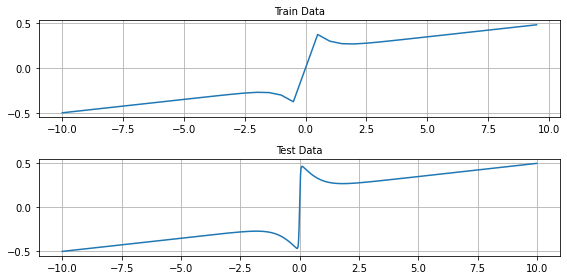

In [4]:
fig = plt.figure(figsize=(8,4))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

ax0.set_title('Train Data',fontsize=10)

ax0.plot(P,Y, label='Train')
ax0.grid()
ax1.set_title('Test Data',fontsize=10)

ax1.plot(PTest,YTest, label='Test')
ax1.grid()
fig.tight_layout()


#### Build a NetworkModel

In [5]:
net = prn.CreateNN([1,3,3,1])

#### Train the model

In [6]:
net = prn.train_LM(P,Y,net,verbose=True,k_max=100,E_stop=1e-5)

Iteration:  0 		Error:  7.034357944660391 	scale factor:  3.0
Iteration:  1 		Error:  3.536236731049385 	scale factor:  0.3
Iteration:  2 		Error:  2.553293717052291 	scale factor:  0.03
Iteration:  3 		Error:  1.3561743481759543 	scale factor:  0.003
Iteration:  4 		Error:  0.7878019927935751 	scale factor:  0.00030000000000000003
Iteration:  5 		Error:  0.36833966624684694 	scale factor:  0.003
Iteration:  6 		Error:  0.34432551120858307 	scale factor:  0.00030000000000000003
Iteration:  7 		Error:  0.15452403915011298 	scale factor:  0.03
Iteration:  8 		Error:  0.14739349316207245 	scale factor:  0.003
Iteration:  9 		Error:  0.01921074788070581 	scale factor:  0.00030000000000000003
Iteration:  10 		Error:  0.016362158126718658 	scale factor:  0.00030000000000000003
Iteration:  11 		Error:  0.004360214444637066 	scale factor:  0.00030000000000000003
Iteration:  12 		Error:  0.002572180029394807 	scale factor:  0.00030000000000000003
Iteration:  13 		Error:  0.0015479397750850752 	

#### Predict train data

In [7]:
y = prn.NNOut(P,net)

#### Predict test data

In [8]:
ytest = prn.NNOut(PTest,net)

### Plot results

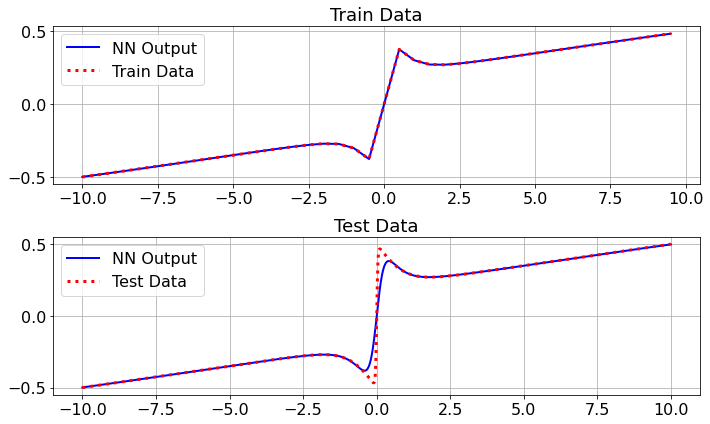

In [9]:
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(211)
fs=18

#Train Data
ax0.set_title('Train Data',fontsize=fs)
ax0.plot(P,y,color='b',lw=2,label='NN Output')
ax0.plot(P,Y,color='r',marker='None',linestyle=':',lw=3,markersize=8,label='Train Data')
ax0.tick_params(labelsize=fs-2)
ax0.legend(fontsize=fs-2,loc='upper left')
ax0.grid()

ax1 = fig.add_subplot(212)
#Test Data
ax1.set_title('Test Data',fontsize=fs)
ax1.plot(PTest,ytest,color='b',lw=2,label='NN Output')
ax1.plot(PTest,YTest,color='r',marker='None',linestyle=':',lw=3,markersize=8,label='Test Data')
ax1.tick_params(labelsize=fs-2)
ax1.legend(fontsize=fs-2,loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()

### In this example a neural network is used to learn the response Y to an input P of a second order transfer function described by:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def generate_aprbs(nstep):
    # random signal generation
    a = np.random.randint(-5, 5, nstep)  # range for amplitude
    b = np.random.randint(10, 100, nstep) # range for freuency
    b[0] = 0

    for i in range(1,np.size(b)):
        b[i] = b[i-1]+b[i]

    # Random Signal
    i=0
    random_signal = np.zeros(nstep)
    while b[i]<np.size(random_signal):
        k = b[i]
        random_signal[k:] = a[i]
        i=i+1

    # PRBS
    a = np.zeros(nstep)
    j = 0
    while j < nstep:
        a[j] = 5
        a[j+1] = -5
        j = j+2

    i=0
    prbs = np.zeros(nstep)
    while b[i]<np.size(prbs):
        k = b[i]
        prbs[k:] = a[i]
        i=i+1

        return random_signal

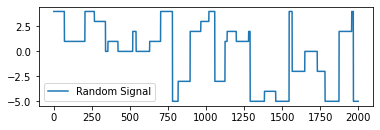

In [12]:
P = generate_aprbs(2000)
plt.figure(0) 
plt.subplot(2,1,1)
plt.plot(P, label='Random Signal')
plt.legend()
plt.show()

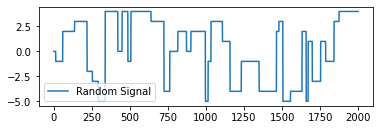

In [13]:
Ptest = generate_aprbs(2000)
plt.figure(0) 
plt.subplot(2,1,1)
plt.plot(Ptest, label='Random Signal')
plt.legend()
plt.show()

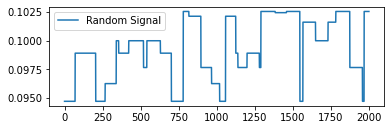

In [14]:
s = P
Y = 10/ (0.1*(s**2)+s+100)
s = Ptest
Ytest = 10/ (0.1*(s**2)+s+100)
plt.figure(0) 
plt.subplot(2,1,1)
plt.plot(Y, label='Random Signal')
plt.legend()
plt.show()

In [15]:
## dIn = [0]  delays input
## dIntern=[1] delay of 1 timestep in the hidden layers
## dOut=[1,2] delay of 1 and 2 timesteps from the output to the first layer 

net = prn.CreateNN([1,2,2,1],dIn=[0],dIntern=[1],dOut=[1,2,3])

In [16]:
net = prn.train_LM(P,Y,net,verbose=True,k_max=100,E_stop=1e-3)

Iteration:  0 		Error:  17.52547703920085 	scale factor:  3.0
Iteration:  1 		Error:  0.022715135916369877 	scale factor:  0.3
Iteration:  2 		Error:  0.0009675669594807277 	scale factor:  0.03
Termination Error reached


In [17]:
y = prn.NNOut(P,net)
ytest = prn.NNOut(Ptest,net)

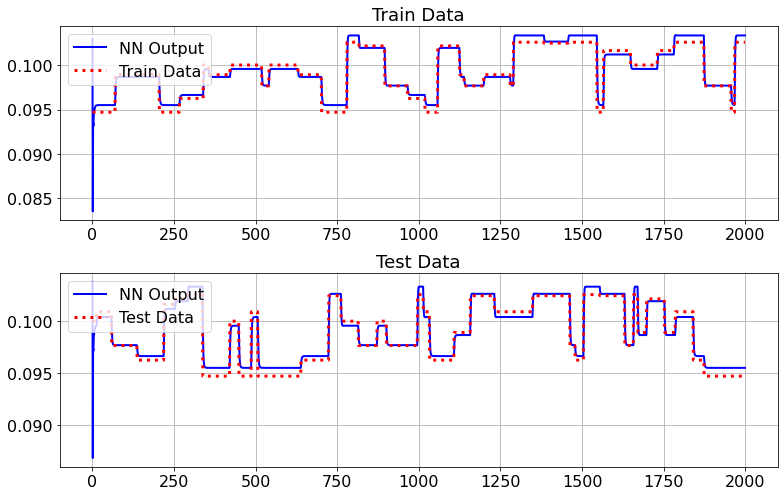

In [18]:
fig = plt.figure(figsize=(11,7))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
fs=18

#Train Data
ax0.set_title('Train Data',fontsize=fs)
ax0.plot(y,color='b',lw=2,label='NN Output')
ax0.plot(Y,color='r',marker='None',linestyle=':',lw=3,markersize=8,label='Train Data')
ax0.tick_params(labelsize=fs-2)
ax0.legend(fontsize=fs-2,loc='upper left')
ax0.grid()

#Test Data
ax1.set_title('Test Data',fontsize=fs)
ax1.plot(ytest,color='b',lw=2,label='NN Output')
ax1.plot(Ytest,color='r',marker='None',linestyle=':',lw=3,markersize=8,label='Test Data')
ax1.tick_params(labelsize=fs-2)
ax1.legend(fontsize=fs-2,loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()